<h1 style="color:#159364; font-family:verdana;"> <center>🫀Heart Disease Diagnosis</center> </h1>

# DataSet Information:
The dataset you provided contains information on various attributes related to heart disease. Here is a description of each attribute:

| Attribute                          | Attribute Type | Attribute Values                       |
|------------------------------------|----------------|----------------------------------------|
| age                                | Real           |                                        |
| sex                                | Binary         | 0 = Female, 1 = Male                   |
| chest pain type                    | Nominal        | 1 = Typical angina,                    |
|                                    |                | 2 = Atypical angina,                   |
|                                    |                | 3 = Non-anginal pain,                  |
|                                    |                | 4 = Asymptomatic                       |
| resting blood pressure             | Real           |                                        |
| serum cholestoral                  | Real           |                                        |
| fasting blood sugar                | Binary         | 0 = No, 1 = Yes                        |
| resting electrocardiographic       | Nominal        | 0 = Normal,                            |
| results                            |                | 1 = Abnormality related to ST-T wave,  |
|                                    |                | 2 = Left ventricular hypertrophy       |
| max heart rate                     | Real           |                                        |
| exercise induced angina            | Binary         | 0 = No, 1 = Yes                        |
| oldpeak                            | Real           |                                        |
| ST segment                         | Ordered        | 1 = Upsloping,                         |
|                                    |                | 2 = Flat,                              |
|                                    |                | 3 = Downsloping                        |
| major vessels                      | Real           |                                        |
| thal                               | Nominal        | 3 = Normal,                            |
|                                    |                | 6 = Fixed defect,                      |
|                                    |                | 7 = Reversible defect                  |
| heart disease                      | Binary         | 1 = Absence,                           |
|                                    |                | 2 = Presence                           |

The dataset consists of a total of 270 observations, with no missing values. The goal is to predict whether a patient has heart disease based on the given attribute information. The cost matrix indicates the cost associated with misclassifying the true and predicted values, where the cost of predicting absence when the true value is absence is 0, the cost of predicting presence when the true value is presence is 0, and the cost of predicting absence when the true value is presence, or predicting presence when the true value is absence, is 5.

<h1 style="color:#159364; font-family:verdana;"> <center>📚Importing Libraries</center> </h1>

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-diagnosis-dataset/dataset_heart.csv


<h1 style="color:#159364; font-family:verdana;"> <center>Data Overview</center> </h1>

In [3]:
df= pd.read_csv('/kaggle/input/heart-disease-diagnosis-dataset/dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


<h1 style="color:#159364; font-family:verdana;"> <center>🧮Summary statistics</center> </h1>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting blood pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting blood sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting electrocardiographic results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
max heart rate,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise induced angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


<h1 style="color:#159364; font-family:verdana;"> <center>Detecting outliers</center> </h1>

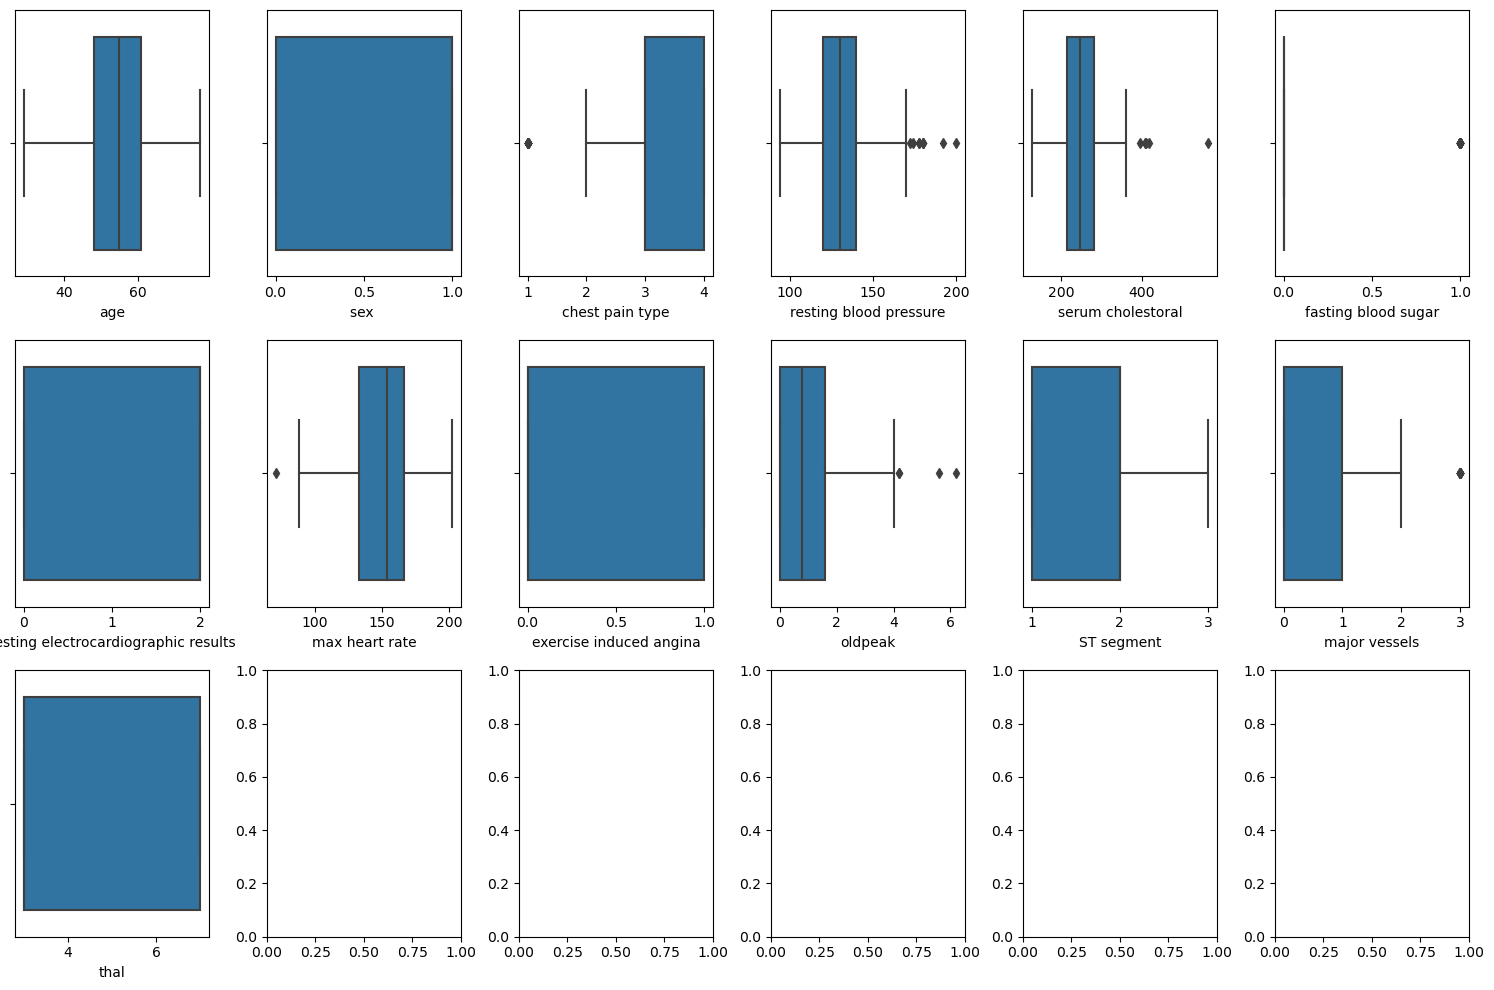

In [5]:
def boxplots(df):
    cols = df.columns[:-1]
    n = (len(cols) - 1) // 6 + 1
    m = min(len(cols), 6)
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 10))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        sns.boxplot(data=df, x=col, ax=axes[i][j])

    plt.tight_layout()
    plt.show()

boxplots(df)

<h1 style="color:#159364; font-family:verdana;"> <center>Fixing outliers</center> </h1>

In [6]:
def outliers_removal(df, i):
    perc = np.percentile(df[i], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - 1.5*iqr
    _max = perc[3] + 1.5*iqr
    df.loc[df[i] > _max, i] = _max
    df.loc[df[i] < _min, i] = _min
    return df

In [7]:
for i in df.columns[:-1]:
    df = outliers_removal(df, i)

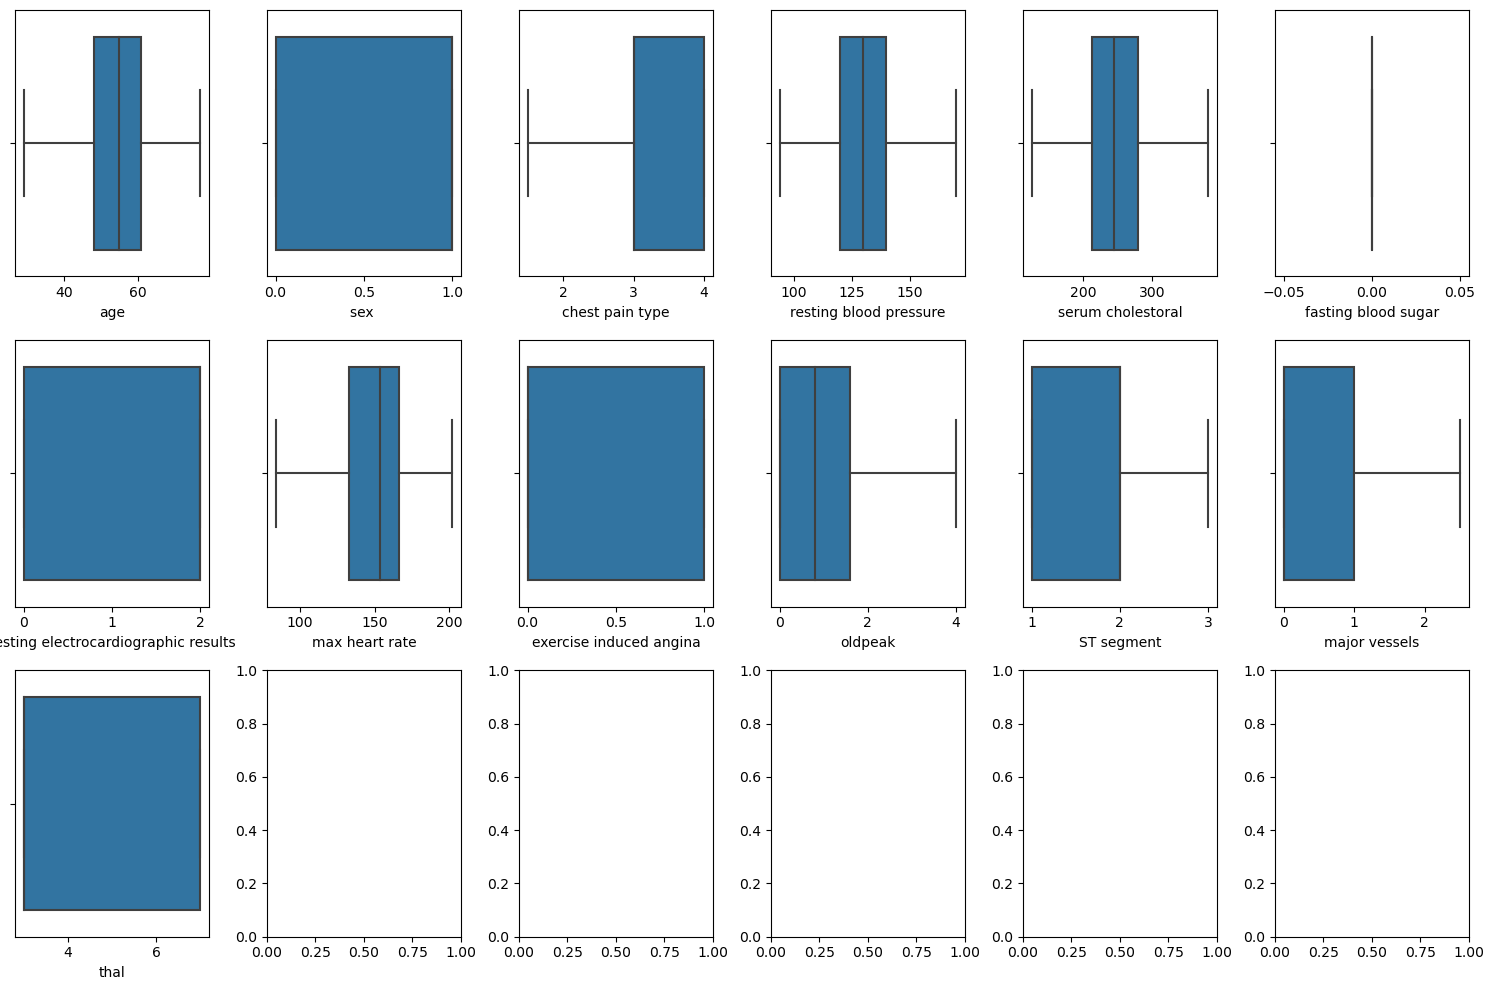

In [8]:
boxplots(df)

<h1 style="color:#159364; font-family:verdana;"> <center>🌲Random Forest Model</center> </h1>

In [9]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']
y = y.map({1: 0, 2: 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<h1 style="color:#159364; font-family:verdana;"> <center>Evaluating model(Accuracy, CM, ROC Curve, Precision-Recall curve, Cross-Validation Scores)</center> </h1>

Accuracy: 0.8518518518518519
Confusion Matrix:
[[31  2]
 [ 6 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



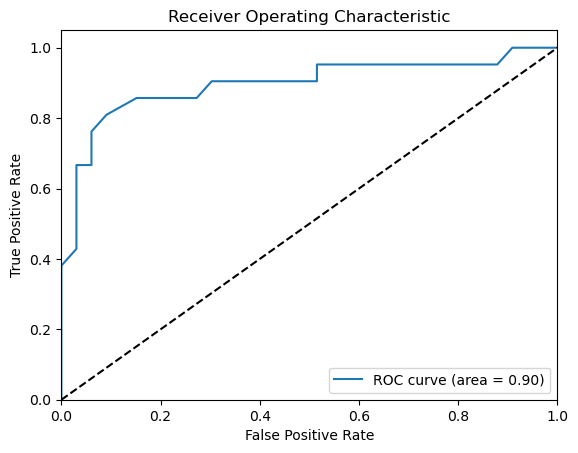

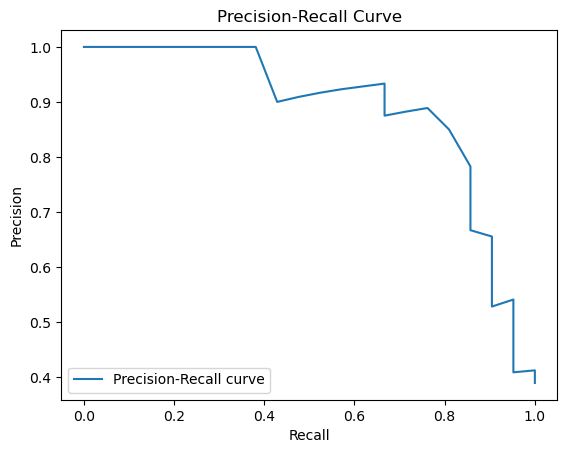

Cross-Validation Scores: [0.68518519 0.77777778 0.88888889 0.81481481 0.88888889]
Average Cross-Validation Score: 0.8111111111111111


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average Cross-Validation Score:', np.mean(cv_scores))

The results obtained from the evaluation metrics provide information about the performance of the classification model.

- Accuracy: The accuracy of the model is 0.8518, which means it correctly predicts the presence or absence of heart disease in approximately 85.18% of the cases.

- Confusion Matrix: The confusion matrix shows the number of true positive (31), true negative (15), false positive (2), and false negative (6) predictions. In this case, the model correctly predicted 31 instances of absence of heart disease and 15 instances of presence of heart disease. However, it misclassified 2 instances of absence as presence and 6 instances of presence as absence.

- Classification Report: The classification report provides metrics such as precision, recall, and F1-score for each class (1 and 2) in the dataset. Precision measures the proportion of true positive predictions out of all positive predictions, recall measures the proportion of true positive predictions out of all actual positives, and F1-score is the harmonic mean of precision and recall. The weighted average F1-score is 0.85, indicating a reasonable balance between precision and recall for both classes.